Name: Smayan Kulkarni\
SapID: 60009230142\
RollNo: D100

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.stats.multicomp as mc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define the data
data = {
    'Sunlight': ['Low']*5 + ['Medium']*5 + ['High']*5 + ['Low']*5 + ['Medium']*5 + ['High']*5,
    'Watering': ['Daily']*15 + ['Weekly']*15,
    'Height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5, 6, 6, 7, 8, 7,
               3, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8]
}

df = pd.DataFrame(data)

# Display data
print("Data:\n", df)

Data:
    Sunlight Watering  Height
0       Low    Daily       6
1       Low    Daily       6
2       Low    Daily       6
3       Low    Daily       5
4       Low    Daily       6
5    Medium    Daily       5
6    Medium    Daily       5
7    Medium    Daily       6
8    Medium    Daily       4
9    Medium    Daily       5
10     High    Daily       6
11     High    Daily       6
12     High    Daily       7
13     High    Daily       8
14     High    Daily       7
15      Low   Weekly       3
16      Low   Weekly       4
17      Low   Weekly       4
18      Low   Weekly       4
19      Low   Weekly       5
20   Medium   Weekly       4
21   Medium   Weekly       4
22   Medium   Weekly       4
23   Medium   Weekly       4
24   Medium   Weekly       4
25     High   Weekly       5
26     High   Weekly       6
27     High   Weekly       6
28     High   Weekly       7
29     High   Weekly       8


In [4]:
# TWO-WAY ANOVA
model = ols('Height ~ C(Sunlight) + C(Watering) + C(Sunlight):C(Watering)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTWO-WAY ANOVA RESULT:")
print(anova_table)


TWO-WAY ANOVA RESULT:
                            sum_sq    df        F    PR(>F)
C(Sunlight)              24.866667   2.0  23.3125  0.000002
C(Watering)               8.533333   1.0  16.0000  0.000527
C(Sunlight):C(Watering)   2.466667   2.0   2.3125  0.120667
Residual                 12.800000  24.0      NaN       NaN


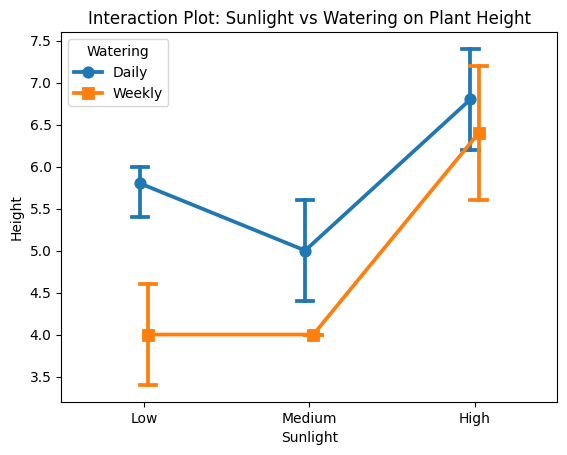

In [5]:
# Visualization of interaction
sns.pointplot(data=df, x='Sunlight', y='Height', hue='Watering', dodge=True, markers=['o', 's'], capsize=.1)
plt.title("Interaction Plot: Sunlight vs Watering on Plant Height")
plt.show()


Tukey HSD Post-Hoc Test Results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
  High-Daily   High-Weekly     -0.4  0.951 -1.8281  1.0281  False
  High-Daily     Low-Daily     -1.0 0.2898 -2.4281  0.4281  False
  High-Daily    Low-Weekly     -2.8    0.0 -4.2281 -1.3719   True
  High-Daily  Medium-Daily     -1.8 0.0079 -3.2281 -0.3719   True
  High-Daily Medium-Weekly     -2.8    0.0 -4.2281 -1.3719   True
 High-Weekly     Low-Daily     -0.6 0.7827 -2.0281  0.8281  False
 High-Weekly    Low-Weekly     -2.4 0.0003 -3.8281 -0.9719   True
 High-Weekly  Medium-Daily     -1.4  0.057 -2.8281  0.0281  False
 High-Weekly Medium-Weekly     -2.4 0.0003 -3.8281 -0.9719   True
   Low-Daily    Low-Weekly     -1.8 0.0079 -3.2281 -0.3719   True
   Low-Daily  Medium-Daily     -0.8 0.5252 -2.2281  0.6281  False
   Low-Daily Medium-Weekly     -1.8 0.0079

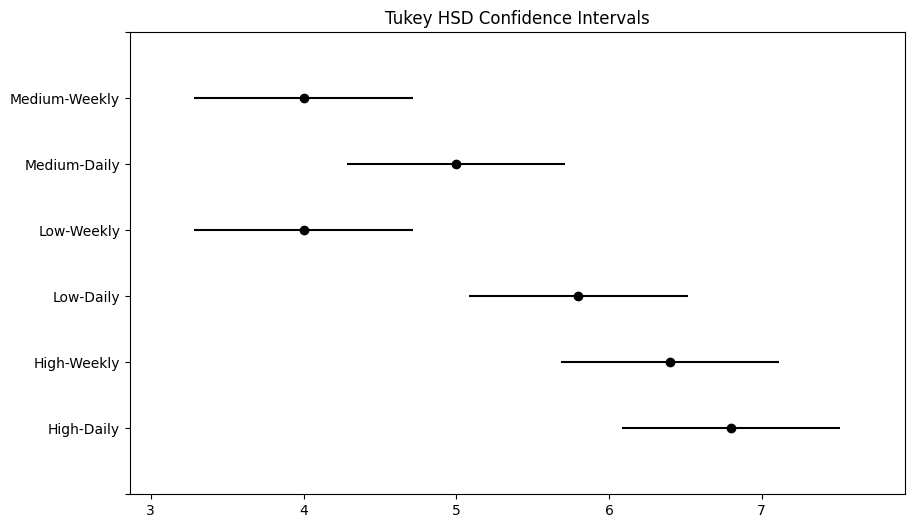

In [6]:
# TUKEY'S HSD TEST (Post-hoc)
df['Group'] = df['Sunlight'] + "-" + df['Watering']
comp = mc.MultiComparison(df['Height'], df['Group'])
tukey_result = comp.tukeyhsd()
print("\nTukey HSD Post-Hoc Test Results:")
print(tukey_result)
tukey_result.plot_simultaneous()
plt.title("Tukey HSD Confidence Intervals")
plt.show()